# Prediction of employee attrition

## Problem statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:

* The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.
* A sizeable department has to be maintained, for the purposes of recruiting new talent.
* More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

The purpose of this project is to build a model will predict weather each employee leave the job or not. 

The dataset is avalible [HERE](https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study)

In [103]:
#neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## Loading data

In [116]:
df = pd.read_csv('general_data.csv', sep=',')

In [117]:
df_train, df_test = train_test_split(df, test_size=.2)
print(df_train.shape)
print(df_test.shape)

(3528, 24)
(882, 24)


## Data Understanding

In [110]:
df_train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1389,19,Yes,Travel_Rarely,Research & Development,8,2,Life Sciences,1,1390,Male,...,1.0,Y,21,8,0,1.0,2,1,1,0
645,29,No,Travel_Rarely,Sales,17,4,Medical,1,646,Male,...,1.0,Y,19,8,1,6.0,3,6,1,0
900,37,No,Travel_Rarely,Research & Development,29,4,Technical Degree,1,901,Male,...,3.0,Y,12,8,1,9.0,2,4,0,2
2350,50,No,Travel_Frequently,Research & Development,3,3,Other,1,2351,Male,...,2.0,Y,20,8,0,32.0,2,30,12,13
468,31,No,Travel_Frequently,Research & Development,5,2,Technical Degree,1,469,Male,...,1.0,Y,12,8,0,4.0,3,4,0,3


### Features description

* Age - Age of the employee	
* Attrition - Whether the employee left in the previous year or not (target variable)
* BusinessTravel - How frequently the employees travelled for business purposes in the last year	
* Department - Department in company	
* DistanceFromHome - Distance from home in kms	
* Education -	Education Level	
        1 'Below College'
		2 'College'
		3 'Bachelor'
		4 'Master'
		5 'Doctor'
* EducationField - Field of education	
* EmployeeCount - Employee count	
* EmployeeNumber - Employee number/id	
* EnvironmentSatisfaction	- Work Environment Satisfaction Level	
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'
* Gender - Gender of employee	
* JobInvolvement	- Job Involvement Level	
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'
* JobLevel - Job level at company on a scale of 1 to 5	
* JobRole - Name of job role in company	
* JobSatisfaction	Job Satisfaction Level	
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'
* MaritalStatus - Marital status of the employee	
* MonthlyIncome - Monthly income in rupees per month	
* NumCompaniesWorked - Total number of companies the employee has worked for
* Over18 - Whether the employee is above 18 years of age or not
* PercentSalaryHike - Percent salary hike for last year	
* PerformanceRating - Performance rating for last year	
        1 'Low'
		2 'Good'
		3 'Excellent'
		4 'Outstanding'
* RelationshipSatisfaction - Relationship satisfaction level	
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'
* StandardHours	Standard hours of work for the employee
* StockOptionLevel - Stock option level of the employee	
* TotalWorkingYears - Total number of years the employee has worked so far	
* TrainingTimesLastYear - Number of times training was conducted for this employee last year	
* WorkLifeBalance	Work life balance level	
        1 'Bad'
		2 'Good'
		3 'Better'
		4 'Best'
* YearsAtCompany	- Total number of years spent at the company by the employee	
* YearsSinceLastPromotion - 	Number of years since last promotion	
* YearsWithCurrManager - Number of years under current manager

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 2657 to 262
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      3528 non-null   int64 
 1   Attrition                3528 non-null   int64 
 2   BusinessTravel           3528 non-null   int64 
 3   Department               3528 non-null   object
 4   DistanceFromHome         3528 non-null   int64 
 5   Education                3528 non-null   int64 
 6   EducationField           3528 non-null   object
 7   EmployeeCount            3528 non-null   int64 
 8   EmployeeID               3528 non-null   int64 
 9   Gender                   3528 non-null   int64 
 10  JobLevel                 3528 non-null   int64 
 11  JobRole                  3528 non-null   object
 12  MaritalStatus            3528 non-null   object
 13  MonthlyIncome            3528 non-null   int64 
 14  NumCompaniesWorked       3528 non-null

In [79]:
unique_dtypes = []
for column in df_train.columns:
    unique_dtypes.append([column, df_train[column].nunique(), df_train[column].dtype.name])
unique_dtypes_df=pd.DataFrame(unique_dtypes, columns=['feature_name', '#_of_unique_values', 'dtype'])
unique_dtypes_df

,feature_name,#_of_unique_values,dtype
0,Age,43,int64
1,Attrition,2,int64
2,BusinessTravel,3,int64
3,Department,3,object
4,DistanceFromHome,29,int64
5,Education,5,int64
6,EducationField,6,object
7,EmployeeCount,1,int64
8,EmployeeID,3528,int64
9,Gender,2,int64


In [80]:
#We can remove features that have only 1 unique value - will add it to feature engineering function
df_train.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace = True)

#We can also remove EmploeeID as it is feature that only has unique values - will add it to feature engineering function
df_train.drop('EmployeeID', axis=1, inplace=True)

In [81]:
#We may assume that columns that have more than 1 and less than 10 unique values are categorical - to check
unique_dtypes_df[(unique_dtypes_df['#_of_unique_values']<10) & (unique_dtypes_df['#_of_unique_values']>1) &
                 (unique_dtypes_df['feature_name'] != 'Attrition')]

,feature_name,#_of_unique_values,dtype
2,BusinessTravel,3,int64
3,Department,3,object
5,Education,5,int64
6,EducationField,6,object
9,Gender,2,int64
10,JobLevel,5,int64
11,JobRole,9,object
12,MaritalStatus,3,object
18,StockOptionLevel,4,int64
20,TrainingTimesLastYear,7,int64


In [82]:
#We may assume that columns that have more than 10 unique values are numerical - to check
unique_dtypes_df[(unique_dtypes_df['#_of_unique_values']>10) & (unique_dtypes_df['#_of_unique_values'] != 4410)]

#parsing float64 to int64
#df.TotalWorkingYears = df.TotalWorkingYears.astype('int64')
#df.NumCompaniesWorked = df.NumCompaniesWorked.astype('int64')

,feature_name,#_of_unique_values,dtype
0,Age,43,int64
4,DistanceFromHome,29,int64
8,EmployeeID,3528,int64
13,MonthlyIncome,1340,int64
16,PercentSalaryHike,15,int64
19,TotalWorkingYears,40,int64
21,YearsAtCompany,37,int64
22,YearsSinceLastPromotion,16,int64
23,YearsWithCurrManager,18,int64


## Missing values

In [83]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [84]:
df_train.NumCompaniesWorked.fillna(df_train.NumCompaniesWorked.median(), inplace = True)
df_train.TotalWorkingYears .fillna(df_train.TotalWorkingYears.median(), inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 2657 to 262
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      3528 non-null   int64 
 1   Attrition                3528 non-null   int64 
 2   BusinessTravel           3528 non-null   int64 
 3   Department               3528 non-null   object
 4   DistanceFromHome         3528 non-null   int64 
 5   Education                3528 non-null   int64 
 6   EducationField           3528 non-null   object
 7   Gender                   3528 non-null   int64 
 8   JobLevel                 3528 non-null   int64 
 9   JobRole                  3528 non-null   object
 10  MaritalStatus            3528 non-null   object
 11  MonthlyIncome            3528 non-null   int64 
 12  NumCompaniesWorked       3528 non-null   int64 
 13  PercentSalaryHike        3528 non-null   int64 
 14  StockOptionLevel         3528 non-null

In [134]:
#df_train['Attrition'] = pd.factorize( df_train['Attrition'] )[0]
#df_train['Gender'] = pd.factorize( df_train['Gender'] )[0]
 
#mapper = {'Non-Travel':0,'Travel_Rarely':1, 'Travel_Frequently':2}
#df_train['BusinessTravel'] = df_train['BusinessTravel'].replace(mapper)
    
#df_train=pd.get_dummies(df , columns=["Department", "EducationField", "JobRole", "MaritalStatus"])
#df_train

In [86]:
df_train['Attrition']=pd.factorize( df_train['Attrition'] )[0]
df_train['Attrition']

2657    0
4205    0
403     0
3444    1
1546    0
       ..
3000    0
3594    0
1972    0
370     0
262     0
Name: Attrition, Length: 3528, dtype: int64

In [87]:
corr_matrix = df_train.corr()
#corr_matrix.info()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                  1.000000
BusinessTravel             0.136415
NumCompaniesWorked         0.049327
PercentSalaryHike          0.040889
Gender                     0.026574
StockOptionLevel          -0.001533
Education                 -0.006180
DistanceFromHome          -0.014217
JobLevel                  -0.020965
YearsSinceLastPromotion   -0.036580
MonthlyIncome             -0.040708
TrainingTimesLastYear     -0.053591
YearsAtCompany            -0.136541
Age                       -0.149688
YearsWithCurrManager      -0.152093
TotalWorkingYears         -0.167864
Name: Attrition, dtype: float64

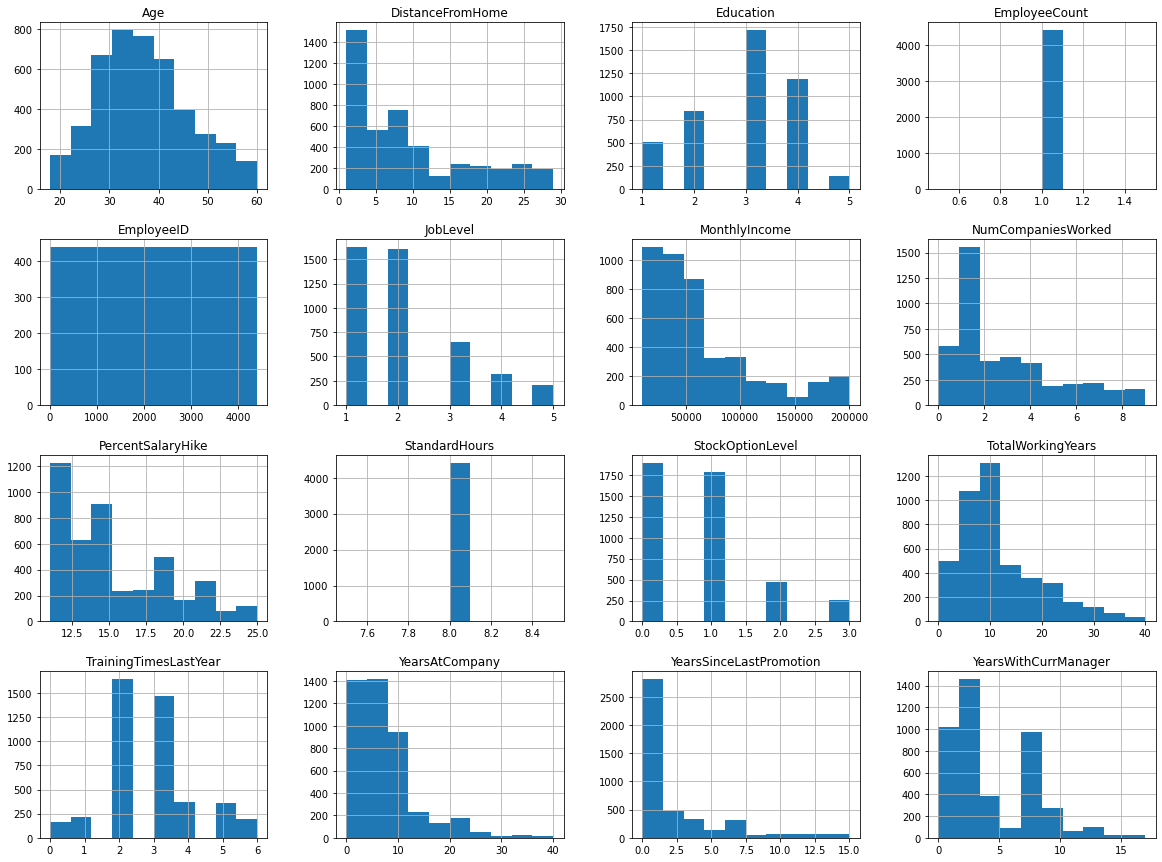

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(figsize=(20,15))
plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(df)

## Categorical data preparation

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [118]:
#Feature engineering: Binominal features were factorized, features that show order set as numbers 0,1,2,3...
#other categorical varbiables were transformed using get_dummies()
def feature_engineering(df):
    
    #missing values
    df.NumCompaniesWorked.fillna(df.NumCompaniesWorked.median(), inplace = True)
    df.TotalWorkingYears .fillna(df.TotalWorkingYears.median(), inplace = True)
    df.TotalWorkingYears = df.TotalWorkingYears.astype('int64')
    df.NumCompaniesWorked = df.NumCompaniesWorked.astype('int64')
    
    df['Attrition'] = pd.factorize( df['Attrition'] )[0]
    df['Gender'] = pd.factorize( df['Gender'] )[0]
    
    mapper = {'Non-Travel':0,'Travel_Rarely':1, 'Travel_Frequently':2}
    df['BusinessTravel'] = df['BusinessTravel'].replace(mapper)
    
    df=pd.get_dummies(df , columns=["Department", "EducationField", "JobRole", "MaritalStatus"])
    
    return df
   
def get_feats(df, black_list = ['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']):
#get only numerical features    
    feats = df.select_dtypes(include=[np.int64, np.uint8, np.bool]).columns.values
    
    return [feat for feat in feats if feat not in black_list]


def get_X_y(df, feats):
    X = df[feats].values
    y = df["Attrition"].values
    
    return X, y


def train_and_get_scores(model, X, y, scoring="accuracy", cv=5):

    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv)
    return np.mean(scores), np.std(scores)

In [119]:
df_train = feature_engineering(df_train)

feats = get_feats(df_train)
X, y = get_X_y(df_train, feats)
model = DecisionTreeClassifier()

train_and_get_scores(model, X, y)

/Users/martakozlowska/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/martakozlowska/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-118-bfb77818321c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

(0.9605955035862817, 0.01079147856704778)

# Decision Tree Classifier

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition

dec_tree = DecisionTreeClassifier()

pipe = Pipeline(steps=[('dec_tree', dec_tree)])

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

tree_GS = GridSearchCV(pipe, parameters)
tree_GS.fit(X, y)


print('Best Criterion:', tree_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', tree_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(tree_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 12

DecisionTreeClassifier(max_depth=12)


In [121]:
model = DecisionTreeClassifier(criterion='gini', max_depth=12)
train_and_get_scores(model, X, y)

(0.926585498161654, 0.0076928420446058365)

In [122]:
import eli5 
model.fit(X,y)
eli5.show_weights(model, feature_names=feats)

Weight,Feature
0.1270,TotalWorkingYears
0.1080,DistanceFromHome
0.1042,MonthlyIncome
0.0814,Age
0.0756,NumCompaniesWorked
0.0591,TrainingTimesLastYear
0.0499,PercentSalaryHike
0.0446,YearsAtCompany
0.0358,BusinessTravel
0.0305,JobLevel


In [123]:
df_test = feature_engineering(df_test)

feats = get_feats(df_test)
X_test, y_test = get_X_y(df_test, feats)

/Users/martakozlowska/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/martakozlowska/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-118-bfb77818321c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [138]:
y_train_pred = model.predict(X)
y_pred = model.predict(X_test)

## Metrics

Sample metrics are presented - each with a short comment on the validity of its use. In general, we want to achieve a low FN (false negative) level - that is, to define the person who will actually leave the company as the one who will not leave. The results are presented for the test set.

### 1) Confusion Matrix

In [139]:
from sklearn.metrics import confusion_matrix

conf_train = confusion_matrix(y,y_train_pred)
conf_test = confusion_matrix(y_test,y_pred)
[conf_train, conf_test]

[array([[2963,    8],
        [  90,  467]]),
 array([[724,   4],
        [ 43, 111]])]

The error matrix is an array that is often used to describe the performance of a classification model. The matrix gives us an insight into the types of mistakes made, so it is the starting point for further considerations. Confusion_matrix shows the proportion of True Negative TN, False Negative FN, False Positive FP, and True Positive TP results. The sum of the diagonals determines that on test set 724 + 111 - correctly modeled results, 4 + 43 incorrectly modeled results. In addition, it was noticed that the model performs much better when it comes to catching negative responses, which is not a good sign, because we would like the model to better catch people who leave the company.

### 2) Accuracy score

In [141]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y, y_train_pred)
acc_test = accuracy_score(y_test,y_pred)
[acc_train, acc_test]

[0.9722222222222222, 0.9467120181405896]

Accuracy of the classification This is the number of correct predictions divided by the total number of predictions made. Accuracy of the model is equal to 94%. It follows that the model adjusted to the data fairly well but overfitting of the model was noticed (to solve this we might use RandomForestClassifier) This is not the best metric for our model as the cost of error is not the same for FN and FP and we have much more negative response data in the set.

### 3) Precision

In [145]:
from sklearn.metrics import precision_score

prec_train = precision_score(y,y_train_pred, average = None)
prec_test = precision_score(y_test,y_pred, average = None)

[prec_train, prec_test]

[array([0.9705208 , 0.98315789]), array([0.94393742, 0.96521739])]

Precision - The total number of correctly classified positive cases by the total number of positive cases predicted. High (general) precision indicates that the example marked as positive is indeed positive. In the case of our task, it is important because we want to detect positive answers. The results show that the model doesn't make many mistakes both in prediction of 0 and 1.

### 4) Recall score

In [147]:
from sklearn.metrics import recall_score

rec_train = recall_score(y,y_train_pred)
rec_test = recall_score(y_test,y_pred)
[rec_train, rec_test]

[0.8384201077199281, 0.7207792207792207]

Sensitivity (recall). It can be interpreted as the probability that the classification will be correct provided that the case is positive. The likelihood that a test performed on a person who will actually leave the company will show that they will leave. It is an important metric from the point of view of this classification (reasons mentioned earlier). Its low value indicates that the model does not reflect the positive results well. This may be due to class imbalance.

CONCLUSIONS: The most important metrics from the point of view of the problem under consideration are:

    - Confusion matrix: allows you to find out what types of errors he makes most often
      model
    - Recall: We are committed to detecting positive values
As the one that carries the most information, I choose recall.

If the model will also detect FP to some extent, it is not so important. From the business point of view, we can imagine that the HR department in the company is tasked with introducing a program to prevent leaving jobs. If I send a person to such a program who would not leave the company anyway, it does not lose much. However, if the model incorrectly qualifies a person who will actually leave, it is likely that without HR activities such a person will actually change their job.

Low sensitivity indicates that the model has a problem recognizing TP cases. However, I note that the model is good at recognizing TN. As mentioned earlier, this may be due to class imbalance. An idea is to use model with balanced classes. I will try to get rid of overfitting by changing the model to RandomForestClassifier.

# Random Forest Classifier

In [274]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
train_and_get_scores(model, X, y)

(0.9793068531131336, 0.008244891888883492)

In [275]:
model.fit(X,y)
y_train_pred = model.predict(X)
y_pred = model.predict(X_test)

In [276]:
conf_train = confusion_matrix(y,y_train_pred)
conf_test = confusion_matrix(y_test,y_pred)
[conf_train, conf_test]

[array([[2971,    0],
        [   0,  557]]),
 array([[728,   0],
        [  9, 145]])]

In [277]:
acc_train = accuracy_score(y, y_train_pred)
acc_test = accuracy_score(y_test,y_pred)
[acc_train, acc_test]

[1.0, 0.9897959183673469]

In [278]:
rec_train = recall_score(y,y_train_pred)
rec_test = recall_score(y_test,y_pred)
[rec_train, rec_test]

[1.0, 0.9415584415584416]